# Assignment 10 - Clustering with K-means and DBSCAN
(20 points)

### Add your name(s) and EIDs below
- Student Name: Juan Chavarria
- Student UT EID: jac23763


### Grading clarifications
1. Before you submit:
    - **Please do not change or remove any variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
    - **Please don't use any other libraries** besides those listed in the import cell below, and those [built in to Python](https://docs.python.org/3.8/library/index.html).
2. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow the points under 1).
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

# Clustering with K-means and DBSCAN

For this assignment, we are going explore two clustering methods:
  - **K-Means**, which creates clusters based on a distance measure
  - **DBSCAN**, which creates clusters based on the density of the poitns in the vicinity of the data.
  
Using small example data sets, we will implement both algorithms and visualize the results.

In [1]:
# Do not import any libraries (i.e. sklearn, scipy, etc.), except for
# Python builtin libraries, unless otherwise specified.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Part 1: K-Means

(**10 points total**)

In the first half of the homework, we will implement the basic $k$-means clustering algorithm, and apply that algorithm to a small data set provided with the assignment in the `data_kmeans.csv` file. We will build some helper functions along the way, test them, and put it all together to apply to our small example data set. 

In [2]:
# Load in our toy dataset.
df_kmeans = pd.read_csv('data_kmeans.csv')
df_kmeans

,x,y
0,-0.731698,-0.874311
1,-0.547702,-0.580320
2,-0.762840,-0.885572
3,-0.340946,-0.810411
4,-0.749065,-0.399218
...,...,...
445,-0.526437,0.543792
446,-0.706212,0.630983
447,-0.470187,0.763061
448,-0.395677,0.542105


## Q1.1 

**Write a function that returns $k$ random rows from a data frame**.
- To initialize the centroids, we pick $k$ random points from a DataFrame.
- Write a function `init_centroids(df_data, k)` that accepts two parameters:
    - A DataFrame `df_data`
    - An integer `k`.
- `init_centroids` should return the initial centroids for our k-means algorithm as a DataFrame.

*Notes*: 
- The index column of the returned DataFrame should range from $0$ to $(k - 1)$ inclusive so that we can use these as the centroid labels.  
- Make sure this function can handle any arbitrary number of features, not just our `x` and `y` columns.
- You **must** use the pandas [`sample`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, with a random state of 42.

(**1 points**)

<!-- BEGIN QUESTION -->



In [3]:
def init_centroids(df_data: pd.DataFrame, k: int) -> pd.DataFrame:
    """Pick k random points from the dataset as the initial centroids for our
    k-means clustering algorithm.
    """
    df_centroids = df_data.sample(n = k, random_state = 42, axis = 0)
    return df_centroids 

In [4]:
# Test our init_centroids function
df_centroids = init_centroids(df_kmeans, 7)
df_centroids

,x,y
407,-0.633437,0.488756
444,-0.597736,0.632194
117,-0.635867,0.166613
30,-0.539351,-0.875532
415,-0.588597,0.293062
157,-0.127985,-0.136639
325,0.342579,0.211717


<!-- END QUESTION -->

## Q1.2 

**Write a function to assign every row in a data frame to a centroid**

- Write a function, `assign_to_centroid`, that accepts two parameters:
  - A DataFrame `df_data`, that represents our data to be clustered
  - A DataFrame `df_centroids`, which is of length `k` and contains the current centroids for our clusters. You generated this for Question 1.1.
- `assign_to_centroid` should return a Series, the same length as `df_data`, that contains the index of the **closest centroid** in `df_centroid`.  
  - Use Euclidean distance as your distance measure. 

*Example*: If a row of data contained the data point $(100, 123)$ and the three centroids were in a data frame that had the following information:
  - Index 0 : $(34, 34)$
  - Index 1 : $(0, 1)$
  - Index 2 : $(83, 99)$
  
The `assign_to_centroid` function would assign the index $2$ to that row of data. 

(**2 points**)

<!-- BEGIN QUESTION -->



In [5]:
def assign_to_centroid(df_data: pd.DataFrame, df_centroids: pd.DataFrame) -> pd.Series:
    """Assign each row in df_data to the nearest centroid in df_centroids.
    Return a Series of the same length as df_data with the centroid index.
    """

    centroids = np.zeros(len(df_data))
    for i in range(len(df_data)): #each i is a point
        x = df_data['x'][i]
        y = df_data['y'][i]
        closest = 100
        for index, row in df_centroids.iterrows():
            x_c = row['x']
            y_c = row['y']
            x_dist = (x_c - x) ** 2
            y_dist = (y_c - y) ** 2
            dist = np.sqrt((x_dist + y_dist))
            if dist < closest:
                centroids[i] = index
                closest = dist
                   
    return centroids

In [6]:
# Test our assign_to_centroid function. Do the lengths match?
s_centroid_assignment = assign_to_centroid(df_kmeans, df_centroids)
s_centroid_assignment

array([ 30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30., 444., 444., 444., 407., 444., 444., 444., 407., 407., 444.,
       444., 444., 444., 444., 407., 444., 444., 444., 444., 444., 444.,
       444., 444., 407., 444., 444., 444., 444., 444., 444., 444., 444.,
       444., 444., 444., 407., 444., 444., 407., 444., 444., 407., 444.,
       444., 444., 407., 407., 415., 415., 407., 415., 117., 444., 117.,
       415., 407., 415., 444., 415., 415., 407., 415., 415., 415., 407.,
       415., 117., 444., 407., 444., 415., 407., 117., 117., 415., 444.,
       444., 117., 415., 407., 117., 407., 117., 117., 157., 117., 415.,
       415., 415., 407., 157., 157., 157., 157., 157., 157., 157., 157.,
       157., 157., 157., 157., 157., 157., 157., 15

<!-- END QUESTION -->

## Q1.3 

**Write a function that recomputes the centroids**

- Write a function, `compute_centroids`, that acceptss two parameters:
    - A DataFrame `df_data`, that represents our data to be clustered
    - A Series `s_centroid_assignment` of the same length that contains the label of the currently-assigned centroid for every row in `df_data`.
- `compute_centroids` should return the a data frame containing the mean value for each unique centroid.  These will be the new centroids we use for the next iteration of $k$-means.
    - This will look similar to the centroid DataFrame you computed for Q1.1.

*Note*: The indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`. 
- For example, if I found the mean value of `df_data` using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`. 

(**2 points**)


<!-- BEGIN QUESTION -->



In [7]:
def compute_centroids(df_data: pd.DataFrame, s_centroid_assignment: pd.Series) -> pd.DataFrame:
    """Compute a new set of centroids, by computing the mean point of 
    each centroid over the points assigned to it.
    """
    df_data_n_cent = df_data.copy()
    df_data_n_cent["Centroid"] = s_centroid_assignment
    
    df_new_centroids = df_data_n_cent.groupby("Centroid").mean()
    return df_new_centroids 

In [8]:
# Test it out
df_new_centroids = compute_centroids( df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
Centroid,,
30.0,-0.696694,-0.699028
117.0,-0.738268,-0.113830
157.0,-0.102365,-0.188876
325.0,0.523364,0.238569
407.0,-0.715983,0.500552
415.0,-0.546913,0.321364
444.0,-0.721574,0.708343


<!-- END QUESTION -->

## Q1.4 

**Write a function that compares two centroid data frames**

- The stopping criterion for k-means is when our centroids have not moved since the last iteration.  
- Write a function `compare_centroids` that accepts two parameters:
    - `df_centroid_a`: A DataFrame of centroid centers (computed in Q1.1 / Q1.3)
    - `df_centroid_b`: A DataFrame of centroid centers (computed in Q1.1 / Q1.3)
- `compare_centroids` should return `True` or `False`, indicating if the centroids at each unique index in the data frame are equal. 

(**1 point**)

<!-- BEGIN QUESTION -->



In [9]:
def compare_centroids(df_centroid_a: pd.DataFrame, df_centroid_b: pd.DataFrame) -> bool:
    """Determine if two sets of centroids are the same.
    """
    centroids_match_x = df_centroid_a['x'].values == df_centroid_b['x'].values
    centroids_match_y = df_centroid_a['y'].values == df_centroid_b['y'].values

    if (np.sum(centroids_match_x) == len(df_centroid_a)) & (np.sum(centroids_match_y) == len(df_centroid_a)):
        return True
    else:
        return False

In [10]:
# Test it out
print(compare_centroids(df_new_centroids, df_new_centroids)) # Should print True
print(compare_centroids(df_new_centroids, df_centroids)) # Should print False

True
False


<!-- END QUESTION -->

## Q1.5 

**Write a function that implements k-means**

- Write a function, `k_means`, that accepts two parameters:
    - A DataFrame `df_data` with values to cluster
    - The number of clusters to form, `k`. 
- `k_means` should return a Series the same length as `df_data` that contains the cluster assignment (an integer from $0 to $(k - 1)$ inclusive) for each row of data. 
- Your function should repeatedly adjust the clusters until they stop changing. Use the helper functions defined in the prior questions. 

(**2 points**)

<!-- BEGIN QUESTION -->



In [11]:
def k_means(df_data: pd.DataFrame, k: int) -> pd.Series:
    """Perform k-means clustering on the dataset df_data, using k clusters.
    This function returns a Series of cluster assignments for each row
    in df_data.
    """
    curr_cent = init_centroids(df_data, k)
    val = False
    while val is False:
        curr_data_cent = assign_to_centroid(df_data, curr_cent)
        new_centroids = compute_centroids(df_data, curr_data_cent)
        val = compare_centroids(curr_cent, new_centroids)

        curr_cent = new_centroids

    s_cluster_assignment = curr_cent
    
    return s_cluster_assignment

In [12]:
# Call k_means with k = 5 to test
s_cluster_assignment = k_means(df_kmeans, 5)
s_cluster_assignment.value_counts()

x          y        
-0.706745  -0.614133    1
-0.697516   0.570447    1
-0.013510  -0.143658    1
 0.298604   0.737194    1
 0.759706  -0.054987    1
Name: count, dtype: int64

<!-- END QUESTION -->

## Q1.6 

**Plot the final clusters**

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot.
- Assign a different color for each cluster. 
- Use the cluster assignments from the previous problem (`s_cluster_assignments`). There should be *five* clusters.
- Label your axes, and give the plot a title. 

(**2 points - manually graded**)

<!-- BEGIN QUESTION -->



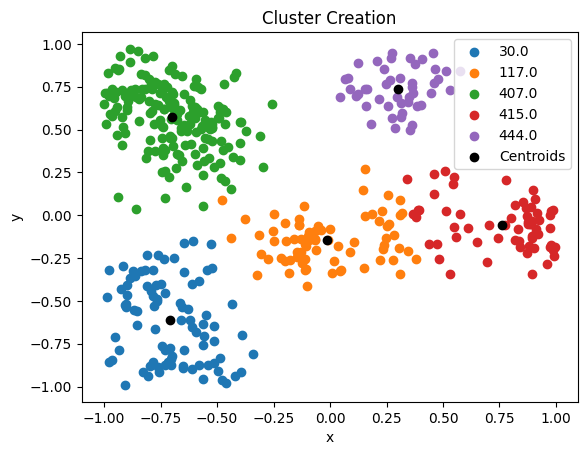

In [13]:
cluster_assign = assign_to_centroid(df_kmeans, s_cluster_assignment)
plot_data = df_kmeans
plot_data['Cluster'] = cluster_assign

plot_data[plot_data['Cluster'] == 30]['x'].values

for i in s_cluster_assignment.index.values:
    x = plot_data[plot_data['Cluster'] == i]['x'].values
    y = plot_data[plot_data['Cluster'] == i]['y'].values
    plt.scatter(x,y, label = i)
plt.scatter(s_cluster_assignment['x'].values,s_cluster_assignment['y'].values, color = 'black', label = 'Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster Creation')
plt.legend()
plt.show()    

<!-- END QUESTION -->

# Part 2: DBSCAN


(**10 points total**)

In the first half of the homework, we will implement the DBSCAN density-based clustering algorithm, and apply that algorithm to a small data set provided with the assignment in the `data_dbscan.csv` file. As before, we will build some helper functions along the way, test them, and put it all together to apply to our small example data set. 

## Q2.1 

**Load the Density Data and try K-means**

1. Load in the data provided `data_dbscan.csv`
2. Cluster this data with k-means algorithm with $k=2$.
3. Visualize the results with a scatter plot, where the color indicates cluster membership. Label your axes, and give the plot a title. 
    - You don't have to write a description, but do you observe anything strange about the clusters? This dataset is a good example of a situation in which k-means is not good at clustering.

(**2 points - manually graded**)

<!-- BEGIN QUESTION -->



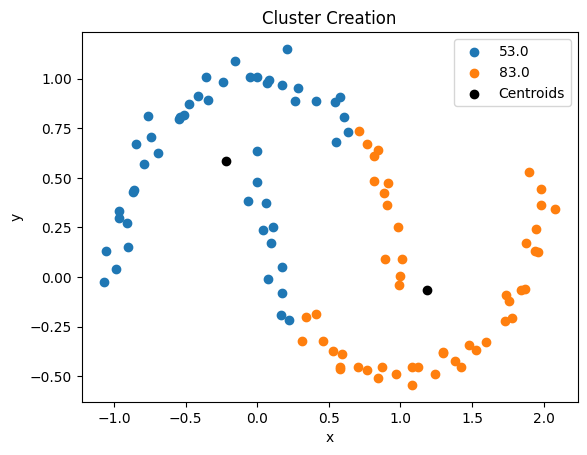

In [14]:
# Load the DBSCAN dataset (data_dbscan)
df_dbscan = pd.DataFrame(pd.read_csv('data_dbscan.csv'))
df_dbscan

# Call k_means with k = 2
s_cluster_assignment = k_means(df_dbscan, 2)

# Plot the results
cluster_assign = assign_to_centroid(df_dbscan, s_cluster_assignment)
plot_data = df_dbscan
plot_data['Cluster'] = cluster_assign

plot_data[plot_data['Cluster'] == 30]['x'].values

for i in s_cluster_assignment.index.values:
    x = plot_data[plot_data['Cluster'] == i]['x'].values
    y = plot_data[plot_data['Cluster'] == i]['y'].values
    plt.scatter(x,y, label = i)
plt.scatter(s_cluster_assignment['x'].values,s_cluster_assignment['y'].values, color = 'black', label = 'Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster Creation')
plt.legend()
plt.show()

<!-- END QUESTION -->

## Q2.2 

**Write a function to implement RangeQuery**

Implement the RangeQuery routine for DBSCAN, following the below [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) on Wikipedia.

```
RangeQuery(DB, distFunc, Q, eps) {
    Neighbors N := empty list
    for each point P in database DB {                      /* Scan all points in the database */
        if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
            N := N ∪ {P}                                   /* Add to result */
        }
    }
    return N
}
```

- Your function, `range_query`. should accept three inputs:
    - `df_data` is a DataFrame containing all the points in our dataset (`DB` in the pseudocode).
    - `q_index` is the data point/row of interest. The actual point can be obtained by calling `df_data.iloc[q_index]`. (`Q` in the pseudocode)
    - `eps` is a floating-point hyperparameter that indicates the radius from the point "Q" to search for neighbors.
    - (`distFunc` in the pseudocode is set as the Euclidean distance. For our purposes, you don't need to pass it in as you can just hard-code this inside your function.)
- `range_query` should return a DataFrame that is a slice of `df_data` containing **all points within `eps` distance of `Q`**, including `Q` itself.
    - Indices should be preserved (i.e., don't call `reset_index()`).

(**2 points**)

<!-- BEGIN QUESTION -->



In [15]:
def range_query(df_data: pd.DataFrame, q_index: int, eps: float) -> pd.DataFrame:
    """RangeQuery routine for DBSCAN. For the point at index q_index, return all
    points in the DataFrame within eps distance of the point. (L2 norm)"""
    df_neighbors = pd.DataFrame()
    x_point = df_data['x'][q_index]
    y_point = df_data['y'][q_index]
    
    for i in range(len(df_data)):
        x = df_data['x'][i]
        y = df_data['y'][i]
        x_dist = (x_point - x) ** 2
        y_dist = (y_point - y) ** 2
        dist = np.sqrt((x_dist + y_dist))
        index = [i]
        if dist <= eps:
            data = pd.DataFrame({'x':[x], 'y':[y]})
            data.index = index
            df_neighbors = pd.concat([df_neighbors, data], ignore_index = False)
    
    return df_neighbors

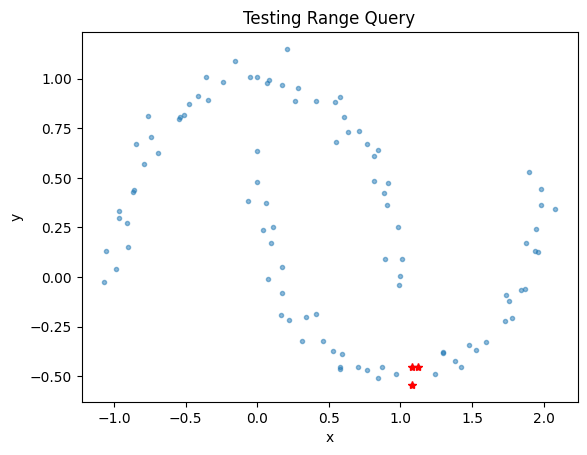

In [16]:
# Test it out.
df_n = range_query(df_dbscan, 0, 0.1)

# We've given you some plotting code to help you visualize the results.
plt.plot( df_dbscan['x'], df_dbscan['y'], '.', alpha = 0.5 )
plt.plot( df_n['x'], df_n['y'], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Range Query')
plt.show()

<!-- END QUESTION -->

## Q2.3 

**Write a function to implement DBSCAN**

Implement DBSCAN, following the below [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) from Wikipedia. 
- This pseudocode uses set notation. If you aren't familiar with set notation, [here](http://www.math.cmu.edu/~bkell/21110-2010s/sets.html) is a handy summary.

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

- Your function `dbscan`, should accept three inputs:
    - `df_data` is a DataFrame containing all the points in our dataset (`DB` in the pseudocode).
    - `eps` is a floating-point hyperparameter that indicates the radius from the point "Q" to search for neighbors.
    - `min_pts` is an integer hyperparameter that is used to determine whether any point "Q" has a large enough number of neighbors.
    - (As before, `dist_func` can be assumed to be Euclidean distance. You only need this for `range_query`, which you already implemented, so there's no need to re-use it here.)
- `dbscan` should return a Series the same length as `df_data` that contains the cluster assignment for each point.
    - If a datapoint is classified as "noise", then the cluster assignment should be "0".
    - All the clusters DBSCAN discoevers should be numbered from $1$ to $k$ inclusive, where $k$ is found automatically by the algorithm and represents the total number of clusters created.

*Hints*:
- [iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) is a handy way to loop through a data frame.
    - However, if you modify the DataFrame within the loop, `iterrows` **doesn't add more iterations to the loop**. 
    - For example, if you start with a dataframe of length $n$ and add $3$ rows, then the `iterrows` will stop after $n$ rows. 
- For the inner loop, you'll need to use a native Python list to dynamically grow the `SeedSet S`. 
    - You can use the `extend` function to merge 2 lists together. For example:

```
x = [1,2,3]
y = [4,5,6]
x.extend(y) # sets x to the list [1, 2, 3, 4, 5, 6]
```
- The [continue](https://docs.python.org/3/tutorial/controlflow.html) statement can be helpful. If the interpreter reaches a `continue` statement, that iteration of the loop ends early at that point, and we move on to the next element in the loop.

*Testing your function*: Call `dbscan` with:
- The `df_dbscan` data frame
- `eps` set to 0.23
- `min_pts` set to 6
- Save the results to `s_cluster_assignments`.

(**3 points**)

<!-- BEGIN QUESTION -->



In [17]:
def dbscan(df_data: pd.DataFrame, eps: float, min_pts: int) -> pd.Series:
    """Perform DBSCAN clustering on the dataset df_data.
    This function returns a Series of cluster assignments for each row
    in df_data. If the cluster is 0, the data point is noise and not
    assigned a cluster.
    """
    s_cluster_assignment = pd.Series([-1] * len(df_data)) #-1 is undefined
    c = 0
    
    for index, row in df_data.iterrows():
        if s_cluster_assignment[index] != -1: #undefined
            continue
            
        neighbors = range_query(df_data, index, eps)
        if len(neighbors) < min_pts: #assigned as noise, noise is 0
            s_cluster_assignment[index] = 0
            continue
        
        c += 1
        s_cluster_assignment[index] = c
        neighbor_list = list(neighbors.index)
        
        for index2 in neighbor_list:
            if s_cluster_assignment[index2] == 0: #is noise
                s_cluster_assignment[index2] = c
            if s_cluster_assignment[index2] == -1: #is undefined
                s_cluster_assignment[index2] = c
            else: #it is already defined to another cluster
                continue
            
            new_neighbors = range_query(df_data, index2, eps)
            if len(new_neighbors) >= min_pts:
                add = list(new_neighbors.index)
                neighbor_list.extend(add)
                
    return s_cluster_assignment

In [32]:
# Test it out
s_cluster_assignment = dbscan(df_dbscan, 0.23, 6)
s_cluster_assignment.value_counts()

1    49
2    48
0     3
Name: count, dtype: int64

<!-- END QUESTION -->

## Q2.4 

**Plot the final clusters** 

Plot the points in the `df_dbscan` data frame using a 2-D scatter plot.
- Assign a different color for each cluster.  
- Use the cluster assignments from the previous problem (`s_cluster_assignments`).
- Label your axes, and give the plot a title.

(**1 point - manually graded**)

<!-- BEGIN QUESTION -->



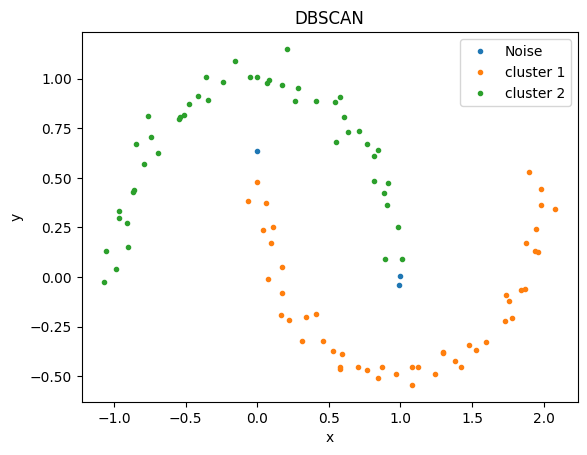

In [34]:
#indices in df_dbscan for each cluster
c0, c1, c2 = [], [], []
for i in range(len(s_cluster_assignment)):
    if s_cluster_assignment[i] == 1:
        c1.append(i)
    elif s_cluster_assignment[i] == 2:
        c2.append(i)
    else:
        c0.append(i)

c0x, c0y, c1x, c1y, c2x, c2y = [], [], [], [], [], []
for index in c0:
    c0x.append(df_dbscan['x'][index])
    c0y.append(df_dbscan['y'][index])
for index in c1:
    c1x.append(df_dbscan['x'][index])
    c1y.append(df_dbscan['y'][index])
for index in c2:
    c2x.append(df_dbscan['x'][index])
    c2y.append(df_dbscan['y'][index])
    
plt.plot(c0x, c0y,'.', label = 'Noise')
plt.plot(c1x, c1y,'.', label = 'cluster 1')
plt.plot(c2x, c2y,'.', label = 'cluster 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN')
plt.show()

<!-- END QUESTION -->

## Q2.5 

**Compare your results to the scikit-learn library**

- Import [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) from scikit-learn.
- Use the same `eps` and `min_samples` parameters as Q2.3.
- Compare the cluster labels from your implementation to those generated by scikit-learn's.

Add some commentary about how you think the results compare. Use the same data and values for eps and minPts.

(**2 points - 1 for code, 1 for commentary**)

The scikit-learn DBSCAN had very similar results to the one coded above. However, the scikit-learn DBSCAN broke up the same clusters into two different clusters, while the one coded combined clusters that were close by. Additionally, the scikit-learn DBSCAN also labeled more points as outliers. These outliers that are not in the one above are between two different scikit-learn clusters, while the one above has these clusters combined, so the outliers are also part of that cluster. 

With the DBSCAN above, not every point had to be a center point of a dense area because of the second loop that labeled points in a cluster if it was close to a point already in the cluster. However, the scikit-learn model also seemed to factor in the density around each individual point, which is why there are more outliers and more clusters. There might be some combination of eps and min_samples for the coded DBSCAN to break up the clusters more like scikit-learn did. We did change the eps, but a small change resulted in a big difference in how the clusters are formed. 

In [20]:
from sklearn.cluster import DBSCAN

# Define your clustering model and fit it to df_dbscan.
clustering = DBSCAN(eps = 0.23, min_samples = 6).fit(df_dbscan)

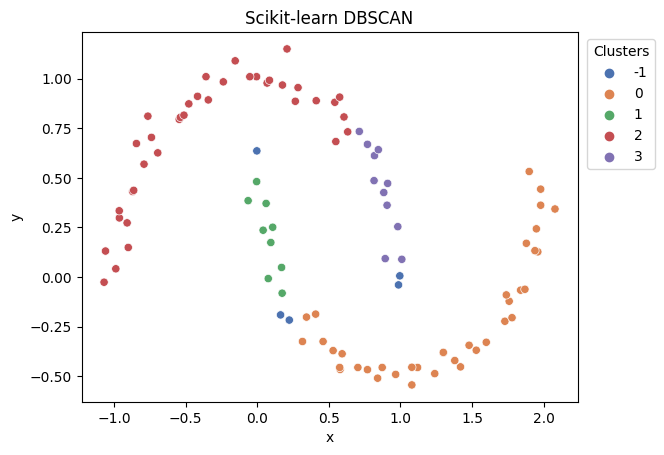

In [25]:
# Analyze and compare their clusters to yours.

#visualization code from https://www.reneshbedre.com/blog/dbscan-python.html
import seaborn as sns
p = sns.scatterplot(data = df_dbscan, x = "x", y = "y", hue = clustering.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.title('Scikit-learn DBSCAN')
plt.show()

<!-- END QUESTION -->

